<a target="_blank" href="https://colab.research.google.com/drive/18Y1lwdrUm1qVG_Yh1Em_1z_3zyLcWAjV?usp=share_link">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## 🕷️ Extract Github Trending Repositories with llama index and scrapegraphai's APIs


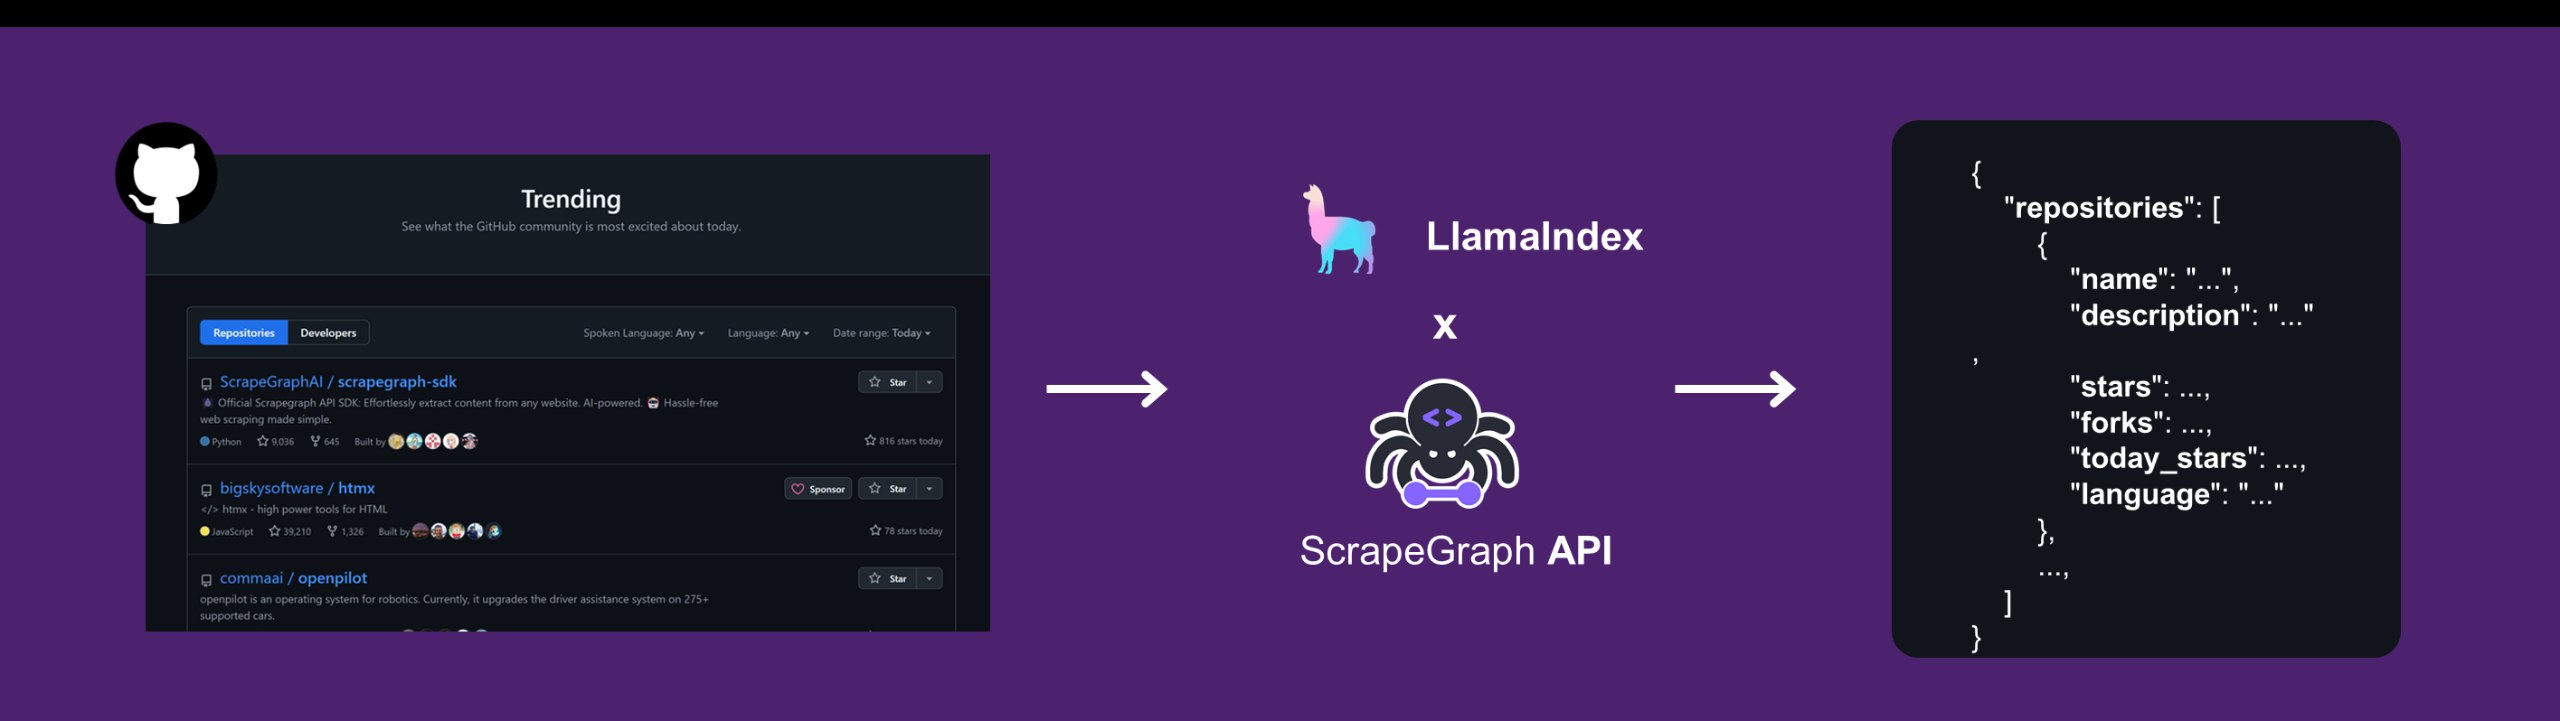

### 🔧 Install `dependencies`

In [ ]:
%%capture
!pip install llama-index
!pip install llama-index-tools-scrapegraphai


### 🔑 Import `ScrapeGraph` API key

You can find the Scrapegraph API key [here](https://dashboard.scrapegraphai.com/)

In [ ]:
import os
from getpass import getpass

# Check if the API key is already set in the environment
sgai_api_key = os.getenv("SGAI_API_KEY")

if sgai_api_key:
    print("SGAI_API_KEY found in environment.")
else:
    print("SGAI_API_KEY not found in environment.")
    # Prompt the user to input the API key securely (hidden input)
    sgai_api_key = getpass("Please enter your SGAI_API_KEY: ").strip()
    if sgai_api_key:
        # Set the API key in the environment
        os.environ["SGAI_API_KEY"] = sgai_api_key
        print("SGAI_API_KEY has been set in the environment.")
    else:
        print("No API key entered. Please set the API key to continue.")


SGAI_API_KEY not found in environment.
SGAI_API_KEY has been set in the environment.


### 📝 Defining an `Output Schema` for Webpage Content Extraction


If you already know what you want to extract from a webpage, you can **define an output schema** using **Pydantic**. This schema acts as a "blueprint" that tells the AI how to structure the response.

<details>
  <summary>Pydantic Schema Quick Guide</summary>

Types of Schemas  

1. Simple Schema  
Use this when you want to extract straightforward information, such as a single piece of content.  

```python
from pydantic import BaseModel, Field

# Simple schema for a single webpage
class PageInfoSchema(BaseModel):
    title: str = Field(description="The title of the webpage")
    description: str = Field(description="The description of the webpage")

# Example Output JSON after AI extraction
{
    "title": "ScrapeGraphAI: The Best Content Extraction Tool",
    "description": "ScrapeGraphAI provides powerful tools for structured content extraction from websites."
}
```

2. Complex Schema (Nested)  
If you need to extract structured information with multiple related items (like a list of repositories), you can **nest schemas**.

```python
from pydantic import BaseModel, Field
from typing import List

# Define a schema for a single repository
class RepositorySchema(BaseModel):
    name: str = Field(description="Name of the repository (e.g., 'owner/repo')")
    description: str = Field(description="Description of the repository")
    stars: int = Field(description="Star count of the repository")
    forks: int = Field(description="Fork count of the repository")
    today_stars: int = Field(description="Stars gained today")
    language: str = Field(description="Programming language used")

# Define a schema for a list of repositories
class ListRepositoriesSchema(BaseModel):
    repositories: List[RepositorySchema] = Field(description="List of GitHub trending repositories")

# Example Output JSON after AI extraction
{
    "repositories": [
        {
            "name": "google-gemini/cookbook",
            "description": "Examples and guides for using the Gemini API",
            "stars": 8036,
            "forks": 1001,
            "today_stars": 649,
            "language": "Jupyter Notebook"
        },
        {
            "name": "TEN-framework/TEN-Agent",
            "description": "TEN Agent is a conversational AI powered by TEN, integrating Gemini 2.0 Multimodal Live API, OpenAI Realtime API, RTC, and more.",
            "stars": 3224,
            "forks": 311,
            "today_stars": 361,
            "language": "Python"
        }
    ]
}
```

Key Takeaways  
- **Simple Schema**: Perfect for small, straightforward extractions.  
- **Complex Schema**: Use nesting to extract lists or structured data, like "a list of repositories."  

Both approaches give the AI a clear structure to follow, ensuring that the extracted content matches exactly what you need.
</details>


In [ ]:
from pydantic import BaseModel, Field
from typing import List

# Schema for Trending Repositories
# This defines only the structure of how a single repository should look like
class RepositorySchema(BaseModel):
    name: str = Field(description="Name of the repository (e.g., 'owner/repo')")
    description: str = Field(description="Description of the repository")
    stars: int = Field(description="Star count of the repository")
    forks: int = Field(description="Fork count of the repository")
    today_stars: int = Field(description="Stars gained today")
    language: str = Field(description="Programming language used")

# Schema that contains a list of repositories
# This references the previous schema
class ListRepositoriesSchema(BaseModel):
    repositories: List[RepositorySchema] = Field(description="List of github trending repositories")

### 🚀 Initialize `ScrapegraphToolSpec` tools and start extraction

Here we use `scrapegraph_smartscraper` to extract structured data using AI from a webpage.


> If you already have an HTML file, you can upload it and use `scrapegraph_local_scrape` instead.

You can find more info in the [official llama-index documentation](https://docs.llamaindex.ai/en/stable/api_reference/tools/scrapegraph/)

In [ ]:
from llama_index.tools.scrapegraph.base import ScrapegraphToolSpec

In [ ]:
scrapegraph_tool = ScrapegraphToolSpec()

`Invoke` the tool

In [ ]:
response = scrapegraph_tool.scrapegraph_smartscraper(
    prompt="Extract only the first ten github trending repositories",
    url="https://github.com/trending",
    api_key=os.environ.get("SGAI_API_KEY"),
    schema=ListRepositoriesSchema,
)

> As you may have noticed, we are not passing the `llm_output_schema` while invoking the tool, this will make life easier to `AI agents` since they will not need to generate one themselves with high risk of failure. Instead, we force the tool to return always a structured output that follows your previously defined schema. To find out more, check the following [README](https://github.com/ScrapeGraphAI/langchain-scrapegraph)


Print the response

In [ ]:
import json

print("Trending Repositories:")
print(json.dumps(response, indent=2))

Trending Repositories:
{
  "repositories": [
    {
      "name": "XiaoMi/ha_xiaomi_home",
      "description": "Xiaomi Home Integration for Home Assistant",
      "stars": 11097,
      "forks": 472,
      "today_stars": 3023,
      "language": "Python"
    },
    {
      "name": "comet-ml/opik",
      "description": "Open-source end-to-end LLM Development Platform",
      "stars": 2741,
      "forks": 169,
      "today_stars": 91,
      "language": "Java"
    },
    {
      "name": "EbookFoundation/free-programming-books",
      "description": "\ud83d\udcda Freely available programming books",
      "stars": 341919,
      "forks": 62038,
      "today_stars": 225,
      "language": "HTML"
    },
    {
      "name": "konfig-dev/konfig",
      "description": "Sunset as of December 2024",
      "stars": 689,
      "forks": 192,
      "today_stars": 224,
      "language": "TypeScript"
    },
    {
      "name": "anoma/anoma",
      "description": "Reference implementation of Anoma",
      "

### 💾 Save the output to a `CSV` file

Let's create a pandas dataframe and show the table with the extracted content

In [ ]:
import pandas as pd

# Convert dictionary to DataFrame
df = pd.DataFrame(response["repositories"])
df

,name,description,stars,forks,today_stars,language
0,XiaoMi/ha_xiaomi_home,Xiaomi Home Integration for Home Assistant,11097,472,3023,Python
1,comet-ml/opik,Open-source end-to-end LLM Development Platform,2741,169,91,Java
2,EbookFoundation/free-programming-books,📚 Freely available programming books,341919,62038,225,HTML
3,konfig-dev/konfig,Sunset as of December 2024,689,192,224,TypeScript
4,anoma/anoma,Reference implementation of Anoma,9451,452,4129,Elixir
5,stripe/stripe-ios,Stripe iOS SDK,2292,1004,49,Swift
6,Guovin/iptv-api,IPTV live TV source update tool,9385,2010,91,Python
7,facebookresearch/AnimatedDrawings,"Code to accompany ""A Method for Animating Chil...",11473,988,398,Python
8,apache/airflow,Apache Airflow - A platform to programmaticall...,37690,14411,25,Python
9,seleniumbase/SeleniumBase,"Python APIs for web automation, testing, and b...",6646,1028,624,Python


Save it to CSV

In [ ]:
# Save the DataFrame to a CSV file
csv_file = "trending_repositories.csv"
df.to_csv(csv_file, index=False)
print(f"Data saved to {csv_file}")

Data saved to trending_repositories.csv


## 🔗 Resources


<p align="left">
  <img src="https://raw.githubusercontent.com/VinciGit00/Scrapegraph-ai/main/docs/assets/api-banner.png"
       alt="ScrapeGraph API Banner" width="600">
</p>


- 🚀 **Get your API Key:** [ScrapeGraphAI Dashboard](https://dashboard.scrapegraphai.com)  
- 🐙 **GitHub:** [ScrapeGraphAI GitHub](https://github.com/scrapegraphai)  
- 💼 **LinkedIn:** [ScrapeGraphAI LinkedIn](https://www.linkedin.com/company/scrapegraphai/)  
- 🐦 **Twitter:** [ScrapeGraphAI Twitter](https://twitter.com/scrapegraphai)  
- 💬 **Discord:** [Join our Discord Community](https://discord.gg/uJN7TYcpNa)  
- 🦙 **LlamaIndex:** [ScrapeGraph docs](https://docs.llamaindex.ai/en/stable/api_reference/tools/scrapegraph/)

Made with ❤️ by the [ScrapeGraphAI](https://scrapegraphai.com) Team  
